# Project 02 - Due Friday, November 11 at 12pm

*Objectives*: Gain experience loading a transactional dataset into a relational database model you define yourself and using SQL to explore its contents. Transform the data into a star schema, documenting the schema visually, and explore the transformed data analytically by writing and executing a number of SQL queries using common syntax and functions and describing your findings.  Gain practice working on these tasks with a partner.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, diagrams, and charts in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible at datanotebook.org, from start to finish: another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in pairs**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, November 11, 12pm.  One member of each pair must submit your notebook to Blackboard; you should not both submit it separately.  You may each push a copy to your own GitHub repository.


## Setup - select and obtain data

The US City Open Data Census has a variety of [transactional data from all over the country](http://us-city.census.okfn.org/).  Select one topic and one city from this Census, download the data, and explain your reason for this choice before proceeding.  Provide a link to the web page for the data set you've chosen.

I strongly encourage you to select a dataset from among the following topics:  Crime, Property Assessment, Campaign Finance Contributions, Service Requests (311), and Web Analytics.

By *transactional* data I mean records at the grain of one event per business process.  In the case of Service Requests (311), for example, that would require data at the level of each individual report of a service request.  If this isn't clear, think about the bike trip data - each individual ride was included - and look for data at that level of event/process specificity.  Avoid data like the Connecticut boating data, which was summarized by year, not individual transactions.

Please aim for a dataset of at least 10,000 individual records, but less than 250,000 records.  A little more or a little less is okay, but try to stay within these limits.

## Problem 1 - examine the data (20 points)

Use `csvstat`, `pandas`, or other tools as you see fit and observe the contents of your dataset.  Review important points from any metadata provided.  Describe what you see:  What do the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some opportunities, challenges, or questions you would like to ask?

#### The csv data we have chosen is Boston crime incident reports from July 2012 to August 2015. In this part, we are going to take a closer examinzation to Boston's 2012-2015 crime rate.

In [1]:
!wget https://data.cityofboston.gov/api/views/7cdf-6fgx/rows.csv

--2016-11-11 11:34:18--  https://data.cityofboston.gov/api/views/7cdf-6fgx/rows.csv
Resolving data.cityofboston.gov (data.cityofboston.gov)... 52.206.140.199
Connecting to data.cityofboston.gov (data.cityofboston.gov)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv’

rows.csv                [      <=>             ]  44.06M  42.4MB/s   in 1.0s   

Last-modified header invalid -- time-stamp ignored.
2016-11-11 11:34:19 (42.4 MB/s) - ‘rows.csv’ saved [46205870]



In [2]:
!mv rows.csv boston.csv

In [3]:
!wc -l boston.csv

268057 boston.csv


In [4]:
!csvcut -n boston.csv

  1: COMPNOS
  2: NatureCode
  3: INCIDENT_TYPE_DESCRIPTION
  4: MAIN_CRIMECODE
  5: REPTDISTRICT
  6: REPORTINGAREA
  7: FROMDATE
  8: WEAPONTYPE
  9: Shooting
 10: DOMESTIC
 11: SHIFT
 12: Year
 13: Month
 14: DAY_WEEK
 15: UCRPART
 16: X
 17: Y
 18: STREETNAME
 19: XSTREETNAME
 20: Location


### What do all the columns mean?

  1: COMPNOS: crime file number 
        
  2: NatureCode: code decription for crime nature
        
  3: INCIDENT_TYPE_DESCRIPTION: the description of the incident type
  
  4: MAIN_CRIMECODE: code description for the main crime of the inccident
  
  5: REPTDISTRICT: crime inccident reported district code
  
  6: REPORTINGAREA: crime inccident reported area number 
  
  7: FROMDATE: the exact time and date when the incident happened.
  
  8: WEAPONTYPE: the type of the weapon when the incident happened
  
  9: Shooting: whether shooting is involved in the incident.
  
 10: DOMESTIC: whether the crime is committed envolving a family or household member such as child abuse. 
 
 11: SHIFT: the shift period of the incident happened
 
 12: Year: The year of the incident happend
 
 13: Month: The month of the incident happend
 
 14: DAY_WEEK: The day of the week of the incident happened
 
 15: UCRPART:Uniform Crime Report parts that being applied in a specific crime
 
 16: X: X Coordinate of the incident location 
 
 17: Y: Y Coordinate of the incident location 
 
 18: STREETNAME: The exact street name of the incident happened
 
 19: XSTREETNAME: additional information of the street name of the incident happened
 
 20: Location: the exact location including latitude and longitude where the incident happened.

### Are there null values?

Yes, there are null values in:

1: COMPNOS

2: NatureCode

5: REPTDISTRICT

8: WEAPONTYPE

11: SHIFT

16: X

17: Y

18: STREETNAME

19: XSTREETNAME

### Which columns interest you the most?

1: COMPNOS

3: INCIDENT_TYPE_DESCRIPTION
    
8: WEAPONTYPE
    
9: Shooting

12: Year
    
13: Month

18: Street name



In [5]:
!csvcut -c1,3,8,9,12,13,18 boston.csv | head | csvlook



|------------+---------------------------+------------+----------+------+-------+----------------|
|  COMPNOS   | INCIDENT_TYPE_DESCRIPTION | WEAPONTYPE | Shooting | Year | Month | STREETNAME     |
|------------+---------------------------+------------+----------+------+-------+----------------|
|  120420285 | RESIDENTIAL BURGLARY      | Other      | No       | 2012 | 7     | ABERDEEN ST    |
|  120419202 | AGGRAVATED ASSAULT        | Firearm    | Yes      | 2012 | 7     | HOWARD AV      |
|  120419213 | ROBBERY                   | Firearm    | No       | 2012 | 7     | JERSEY ST      |
|  120419223 | COMMERCIAL BURGLARY       | Other      | No       | 2012 | 7     | COLUMBIA RD    |
|  120419236 | ROBBERY                   | Firearm    | No       | 2012 | 7     | COLLINS ST     |
|  120419239 | ROBBERY                   | Firearm    | Yes      | 2012 | 7     | SYDNEY ST      |
|  120419257 | ROBBERY                   | Firearm    | No       | 2012 | 7     | REGENT ST      |
|  1204194

### Which columns present some opportunities, challenges, or questions you would like to ask?

1. What is the trend of the crime rate over years?
2. What is the most common type of weapon type?
3. Which type of the crimes that happens most frequently?
4. When does the crimes happen most frequently in a year?
5. When does the crimes happen most frequently during a week time?

## Problem 2 - define a database model, load the data, and explore (20 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset as it is in its raw form into the database, and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Explore the data to zero in on a few themes you would like to further study analytically.  Discuss columns that present opportunities for extraction into dimensions, and identify the specific columns that contain facts you want to measure.

In [6]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [7]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [8]:
!createdb -U dbuser boston

createdb: database creation failed: ERROR:  database "boston" already exists


In [9]:
%sql postgresql://dbuser@localhost:5432/bostonhttp://datanotebook.org/user/SEgFzzgLSvul/notebooks/project2_newest.ipynb#

'Connected: dbuser@boston'

In [10]:
!shuf -n 10000 boston.csv | csvstat

  1. 120793628
	<class 'int'>
	Nulls: True
	Min: 120024083
	Max: 152049751
	Sum: 1295974359495
	Mean: 135576353.1221885
	Median: 130785123
	Standard Deviation: 9808820.370473715
	Unique values: 9559
  2. BERPT 
	<class 'str'>
	Nulls: True
	Unique values: 198
	5 most frequent values:
		IVPER:	1103
		ARREST:	587
		LARCRT:	578
		MVA:	551
		LARCEN:	409
	Max length: 6
  3. RESIDENTIAL BURGLARY
	<class 'str'>
	Nulls: False
	Unique values: 110
	5 most frequent values:
		VAL:	1024
		OTHER LARCENY:	867
		SIMPLE ASSAULT:	654
		MedAssist:	647
		VANDALISM:	560
	Max length: 32
  4. 05RB
	<class 'str'>
	Nulls: False
	Unique values: 71
	5 most frequent values:
		VAL:	1030
		06xx:	905
		08xx:	677
		MedAssist:	673
		14xx:	584
	Max length: 10
  5. D14
	<class 'str'>
	Nulls: True
	Unique values: 12
	5 most frequent values:
		B2:	1486
		D4:	1358
		C11:	1334
		A1:	1117
		B3:	935
	Max length: 4
  6. 794
	<class 'int'>
	Nulls: False
	Min: 0
	Max: 960
	Sum: 2506583
	Mean: 250.6833683368337
	Median: 167
	Stand

In [11]:
%%sql
DROP TABLE IF EXISTS boston;
CREATE TABLE boston (
    COMPNOS INTEGER,
    NatureCode VARCHAR(6),
    INCIDENT_TYPE_DESCRIPTION VARCHAR(255),
    MAIN_CRIMECODE VARCHAR(10),
    REPTDISTRICT VARCHAR(4),
    REPORTINGAREA INTEGER,
    FROMDATE TIMESTAMP,
    WEAPONTYPE VARCHAR(34),
    Shooting BOOLEAN,
    DOMESTIC BOOLEAN,
    SHIFT VARCHAR(255),
    Year INTEGER,
    Month INTEGER,
    DAY_WEEK VARCHAR(9),
    UCRPART VARCHAR(255),
    X FLOAT,
    Y FLOAT,
    STREETNAME VARCHAR(255),
    XSTREETNAME VARCHAR(255),
    Location VARCHAR(37)
    )

Done.
Done.


[]

In [12]:
!pwd

/home/jovyan/work


In [13]:
%%sql
COPY boston FROM '/home/jovyan/work/boston.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

268056 rows affected.


[]

In [14]:
%%sql
SELECT COUNT(*) FROM boston;

1 rows affected.


count
268056


In [15]:
%%sql
SELECT column_name, data_type, character_maximum_length, is_nullable
FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'boston';

20 rows affected.


column_name,data_type,character_maximum_length,is_nullable
compnos,integer,None,YES
naturecode,character varying,6,YES
incident_type_description,character varying,255,YES
main_crimecode,character varying,10,YES
reptdistrict,character varying,4,YES
reportingarea,integer,None,YES
fromdate,timestamp without time zone,None,YES
weapontype,character varying,34,YES
shooting,boolean,None,YES
domestic,boolean,None,YES


In [16]:
%%sql
SELECT TO_CHAR(FROMDATE, 'YYYY-MM-DD') AS day_of_year, 
    TO_CHAR(FROMDATE, 'YYYY') AS year,
    TO_CHAR(FROMDATE, 'MM') AS month,
    TO_CHAR(FROMDATE, 'DD') AS day,
    TO_CHAR(FROMDATE, 'Day') AS day_of_week_str,
    TO_CHAR(FROMDATE, 'D') AS day_of_week,
    CASE WHEN CAST(TO_CHAR(FROMDATE, 'D') AS INTEGER) >= 6 
        THEN 1 
        ELSE 0
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(FROMDATE, 'D') AS INTEGER) < 6 
        THEN 1 
        ELSE 0
    END AS is_weekday,
    TO_CHAR(FROMDATE, 'HH24') AS hour_24,
    TO_CHAR(FROMDATE, 'Q') AS quarter
FROM boston
LIMIT 10;

10 rows affected.


day_of_year,year,month,day,day_of_week_str,day_of_week,is_weekend,is_weekday,hour_24,quarter
2012-07-08,2012,07,08,Sunday,1,0,1,06,3
2012-07-08,2012,07,08,Sunday,1,0,1,06,3
2012-07-08,2012,07,08,Sunday,1,0,1,06,3
2012-07-08,2012,07,08,Sunday,1,0,1,06,3
2012-07-08,2012,07,08,Sunday,1,0,1,07,3
2012-07-08,2012,07,08,Sunday,1,0,1,07,3
2012-07-08,2012,07,08,Sunday,1,0,1,07,3
2012-07-08,2012,07,08,Sunday,1,0,1,07,3
2012-07-08,2012,07,08,Sunday,1,0,1,07,3
2012-07-08,2012,07,08,Sunday,1,0,1,08,3


In [17]:
%%sql
SELECT DISTINCT INCIDENT_TYPE_DESCRIPTION, WEAPONTYPE,Shooting
FROM boston ORDER BY INCIDENT_TYPE_DESCRIPTION
limit 100;

100 rows affected.


incident_type_description,weapontype,shooting
07RV,Unarmed,False
07RV,Other,False
07RV,Knife,False
32GUN,Knife,False
32GUN,Firearm,False
32GUN,Other,False
32GUN,Unarmed,False
AGGRAVATED ASSAULT,Firearm,False
AGGRAVATED ASSAULT,Unarmed,False
AGGRAVATED ASSAULT,Knife,False


### What is the trend of the number of crimes happened from 2012-2015?

Boston database is the collection of the crime rate from 2012 to 2015. So we are interested in the total number of the crimes happended each year and want to see if there is a trend regarding the crime rate over the years. 

There is a dramatic reduction of the crimes rate in 2015. There is approximately 43% reduction in Boston crime rate in 2015

In [18]:
%%sql
SELECT year as crime_Year, count(*) as Number_of_Crimes
FROM boston
GROUP BY crime_year
ORDER BY crime_year ASC
;

4 rows affected.


crime_year,number_of_crimes
2012,43186
2013,87052
2014,88058
2015,49760


<Container object of 4 artists>

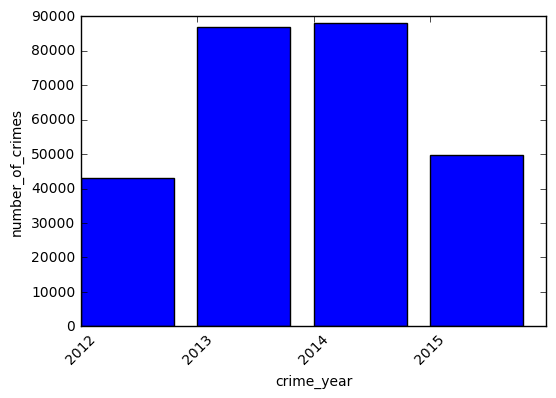

In [19]:
%matplotlib inline
result = _
result.bar()

In [20]:
%%sql
SELECT WEAPONTYPE as weapon_type, count(*) as count
FROM boston
GROUP BY WEAPONTYPE
ORDER BY count DESC
LIMIT 5
;

5 rows affected.


weapon_type,count
Unarmed,194932
Other,52102
None,11319
Firearm,5299
Knife,3867


([<matplotlib.patches.Wedge at 0x7fee82846438>,
  <matplotlib.text.Text at 0x7fee8285ad30>])

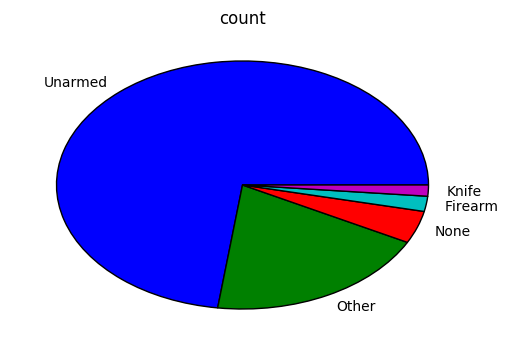

In [21]:
%matplotlib inline
result = _
result.pie()

### Which type of the crimes that happens most frequently?

VAL and Larceny / Theft hit the top of the crime list, far outweighing any other crime types.

In [22]:
%%sql
SELECT INCIDENT_TYPE_DESCRIPTION as CRIME_TYPE, count(*) as Number_of_Crimes
FROM boston
GROUP BY CRIME_TYPE 
ORDER BY Number_of_Crimes DESC
;

127 rows affected.


crime_type,number_of_crimes
VAL,27363
OTHER LARCENY,24443
SIMPLE ASSAULT,17697
MedAssist,17128
MVAcc,13832
VANDALISM,13339
InvPer,12937
LARCENY FROM MOTOR VEHICLE,12742
DRUG CHARGES,12042
FRAUD,8742


Let's narrow down the search, we focus on the recent data year 2015. Which type of the crimes that happens most frequently in 2015? The answer to that is still the same: Val and other larceny


In [23]:
%%sql
SELECT INCIDENT_TYPE_DESCRIPTION as CRIME_TYPE, count(*) as Number_of_Crimes
FROM boston
WHERE Year = '2015'
GROUP BY CRIME_TYPE 
ORDER BY Number_of_Crimes DESC
LIMIT 20
;

20 rows affected.


crime_type,number_of_crimes
VAL,4809
OTHER LARCENY,3228
MedAssist,2891
SIMPLE ASSAULT,2640
VANDALISM,2115
MVAcc,2078
InvPer,2048
DRUG CHARGES,1821
LARCENY FROM MOTOR VEHICLE,1434
TOWED,1411


### In Boston, which area is the unsafest area, that has the most number of crimes occured?

Washington ST seems to be the top 1 unsafest location that has the most number of crimes happened over the three years. It has 14552 crimes. 

In [24]:
%%sql
SELECT STREETNAME as Address, count(*) as Number_of_Crimes
FROM boston
GROUP BY Address 
ORDER BY Number_of_Crimes DESC
LIMIT 10
;

10 rows affected.


address,number_of_crimes
WASHINGTON ST,14552
BOYLSTON ST,6572
BLUE HILL AV,6172
DORCHESTER AV,4549
TREMONT ST,4447
MASSACHUSETTS AV,4434
COMMONWEALTH AV,4345
CENTRE ST,3903
HARRISON AV,3005
HYDE PARK AV,2897


In [25]:
%%sql
SELECT INCIDENT_TYPE_DESCRIPTION as CRIME_TYPE, count(*) as Number_of_Crimes
FROM boston
WHERE STREETNAME IN (
    SELECT STREETNAME
    FROM boston
    GROUP BY STREETNAME
    ORDER BY count(*) DESC
    LIMIT 1)
GROUP BY CRIME_TYPE
ORDER BY Number_of_Crimes DESC
LIMIT 5
;

5 rows affected.


crime_type,number_of_crimes
OTHER LARCENY,1933
DRUG CHARGES,1643
VAL,1247
SIMPLE ASSAULT,956
MVAcc,780


In [26]:
%%sql
UPDATE boston SET COMPNOS = -999 where COMPNOS is null;
UPDATE boston SET NatureCode = 'Null' where naturecode is null;
UPDATE boston SET REPTDISTRICT = 'Null' where reptdistrict is null;
UPDATE boston SET WEAPONTYPE = 'Null' where weapontype is null;
UPDATE boston SET SHIFT = 'Null' where shift is null;
UPDATE boston SET X = -999 where x is null;
UPDATE boston SET Y = -999 where y is null;
UPDATE boston SET STREETNAME = 'Null' where streetname is null;
UPDATE boston SET XSTREETNAME = 'Null' where xstreetname is null;


12259 rows affected.
0 rows affected.
3 rows affected.
0 rows affected.
12265 rows affected.
14981 rows affected.
14981 rows affected.
1 rows affected.
208861 rows affected.


[]

## Problem 3 - define a star schema, and load your data into it (30 points)

Define a star schema consisting of at least one fact table and at least two dimensions.  Transform your source data into the new fact table and dimensions.  Discuss your key modeling decisions.

Document your star schema with a diagram.  There several tools available for this, such as Google Docs and Microsoft Visio.

In [27]:
!pwd

/home/jovyan/work


In [28]:
from IPython.display import Image
PATH = "/home/jovyan/work/"

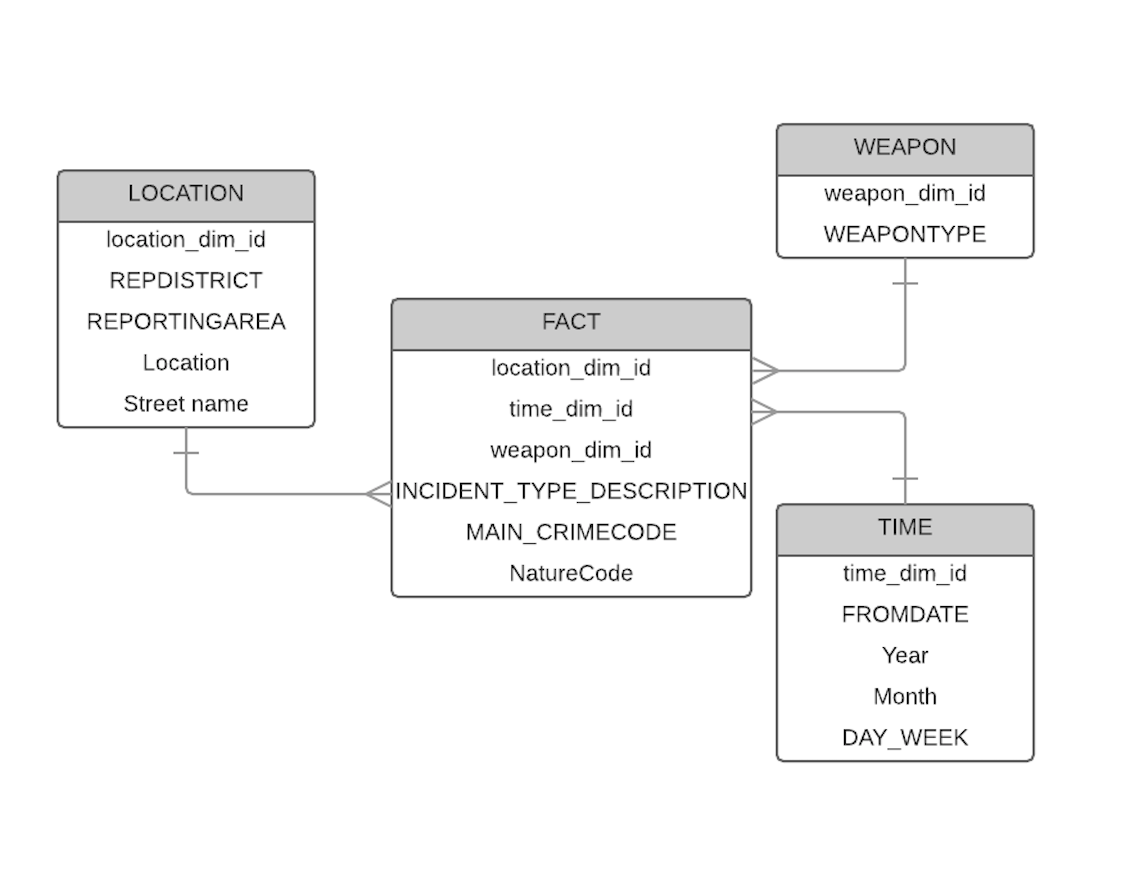

In [29]:
Image(filename = PATH + "schema.png", width=1000, height=1000)

### Create a dimension for location:

In [30]:
%%sql
DROP TABLE IF EXISTS location_dim;
CREATE TABLE location_dim (
  location_dim_id SERIAL PRIMARY KEY,
  REPTDISTRICT VARCHAR(255),
  REPORTINGAREA VARCHAR(255),
  LOCATION VARCHAR(255),
  STREETNAME VARCHAR(255) 
);

Done.
Done.


[]

Insert location data into location dimension table:

In [31]:
%%sql
INSERT INTO location_dim (REPTDISTRICT,REPORTINGAREA,LOCATION,STREETNAME)
SELECT 
    REPTDISTRICT,
    REPORTINGAREA,
    LOCATION,
    STREETNAME
from boston
;

268056 rows affected.


[]

In [32]:
%%sql
select * 
from location_dim 
limit 20;

20 rows affected.


location_dim_id,reptdistrict,reportingarea,location,streetname
1,D4,625,"(42.34284135, -71.09698955)",JERSEY ST
2,B2,295,"(42.32425136, -71.08620956)",REGENT ST
3,D4,162,"(42.33490135, -71.07516956)",MASSACHUSETTS AV
4,B2,296,"(42.32170135, -71.08190956)",WARREN ST
5,D14,796,"(42.35168135, -71.12518954)",COMMONWEALTH AV
6,C11,462,"(42.30147136, -71.07512956)",BULLARD ST
7,E18,493,"(42.26728137, -71.11588955)",BRADLEE ST
8,D4,629,"(42.34638135, -71.10379454)",ABERDEEN ST
9,C11,248,"(42.31371136, -71.05572957)",AUCKLAND ST
10,B2,329,"(42.30754136, -71.07608956)",COLUMBIA RD


### Create a dimension table for weapon:

In [33]:
%%sql
DROP TABLE IF EXISTS weapon_dim;
CREATE TABLE weapon_dim (
 weapon_dim_id SERIAL PRIMARY KEY,
 WEAPONTYPE VARCHAR(255) 
);

Done.
Done.


[]

Insert weapon data into weapon dimension table:

In [34]:
%%sql
INSERT INTO weapon_dim(WEAPONTYPE)
SELECT WEAPONTYPE 
from boston;

268056 rows affected.


[]

In [35]:
%%sql
select * 
from weapon_dim 
limit 20;

20 rows affected.


weapon_dim_id,weapontype
1,Firearm
2,Firearm
3,Unarmed
4,Firearm
5,Unarmed
6,Unarmed
7,Unarmed
8,Other
9,Unarmed
10,Unarmed


### Create another dimension for time:

In [36]:
%%sql
DROP TABLE IF EXISTS time_dim;
CREATE TABLE time_dim (
  time_dim_id SERIAL PRIMARY KEY,
  FROMDATE TIMESTAMP,
  YEAR INTEGER,
  MONTH INTEGER,
  DAY_WEEK VARCHAR(255)   
);

Done.
Done.


[]

Insert time data into time dimension table:

In [37]:
%%sql
INSERT INTO time_dim (FROMDATE,YEAR,MONTH,DAY_WEEK)
SELECT 
    FROMDATE,
    YEAR,
    MONTH,
    DAY_WEEK
from boston
;

268056 rows affected.


[]

In [38]:
%%sql
select * 
from time_dim 
limit 20;

20 rows affected.


time_dim_id,fromdate,year,month,day_week
1,2012-07-08 06:26:00,2012,7,Sunday
2,2012-07-08 07:50:00,2012,7,Sunday
3,2012-07-08 09:30:00,2012,7,Sunday
4,2012-07-08 09:55:00,2012,7,Sunday
5,2012-07-08 10:01:00,2012,7,Sunday
6,2012-07-08 11:09:00,2012,7,Sunday
7,2012-07-08 11:51:00,2012,7,Sunday
8,2012-07-08 06:00:00,2012,7,Sunday
9,2012-07-08 12:30:00,2012,7,Sunday
10,2012-07-08 13:00:00,2012,7,Sunday


### Create the fact table that contains the unique identifiers from dimension tables and the values we want to measure. 

In [39]:
%%sql
DROP TABLE IF EXISTS fact;
CREATE TABLE fact
(   location_dim_id SERIAL NOT NULL,
    time_dim_id SERIAL NOT NULL,
    weapon_dim_id SERIAL NOT NULL,
    
    INCIDENT_TYPE_DESCRIPTION varchar(255),
    MAIN_CRIMECODE varchar(10),
    NatureCode varchar(6)
);

Done.
Done.


[]

In [40]:
%%sql
INSERT INTO fact(location_dim_id)
SELECT location_dim_id
FROM location_dim;

268056 rows affected.


[]

In [41]:
%%sql
INSERT INTO fact(time_dim_id)
SELECT time_dim_id
FROM time_dim;

268056 rows affected.


[]

In [42]:
%%sql
INSERT INTO fact(weapon_dim_id)
SELECT weapon_dim_id
FROM weapon_dim;

268056 rows affected.


[]

In [43]:
%%sql
INSERT INTO fact(INCIDENT_TYPE_DESCRIPTION, MAIN_CRIMECODE, NatureCode )
SELECT INCIDENT_TYPE_DESCRIPTION, MAIN_CRIMECODE, NatureCode
from boston
;

268056 rows affected.


[]

## Problem 4 - explore your data in its new schema (30 points)

Strictly using the dimensional model tables you defined and populated for Problem 3, explore your data in its new form.  Use any of the query strategies we've seen in class, including transformations, aggregates, subqueries, rollups, and, of course, joins.  Add plots to highlight particular themes that stand out.  Describe your thinking and observations along the way.

Now we can take a look at how those crime incidents distributed in years from 2012-2015 and see if we can find any pattern. It seems that the result peaks in year 2013 and 2014 and started to go down in year 2015.

In [44]:
%%sql
SELECT year, COUNT(*) 
FROM time_dim a, fact b
WHERE a.time_dim_id = b.time_dim_id
GROUP BY a.year
ORDER BY year;

4 rows affected.


year,count
2012,86372
2013,174104
2014,176116
2015,99520


<Container object of 4 artists>

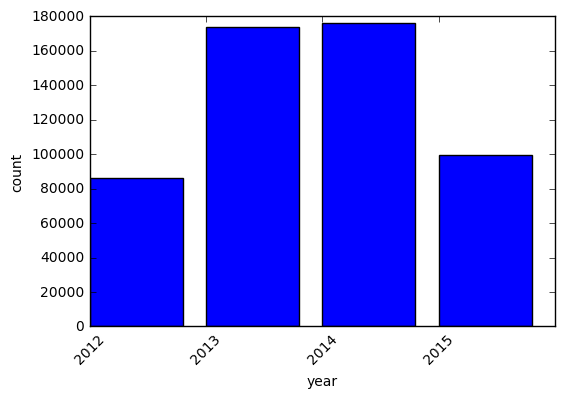

In [45]:
%matplotlib inline
result = _
result.bar()

we are interested in the crime rates in each month over the 4 years. It seems like that July has the most number of crimes occured. The rest of each month has the similar crime rate.

In [46]:
%%sql
SELECT month, COUNT(*) 
FROM time_dim a, fact b
WHERE a.time_dim_id = b.time_dim_id
GROUP BY a.month
ORDER BY month;

12 rows affected.


month,count
1,41394
2,36922
3,42590
4,41860
5,46588
6,44264
7,58226
8,51050
9,46318
10,45672


<Container object of 12 artists>

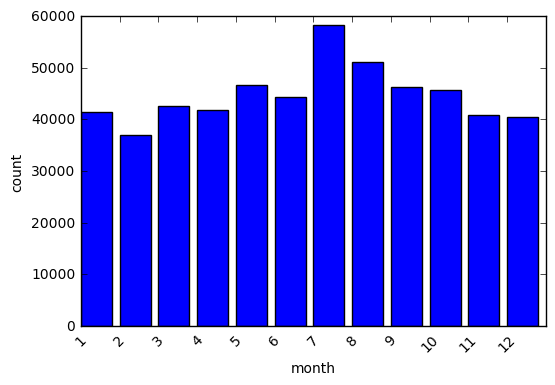

In [47]:
%matplotlib inline
result = _
result.bar()

We are also interested in finding out whether the crime incidents happened around some particular areas more often so we run the query to look at the relationship between location and crime count. 

In [48]:
%%sql
SELECT LOCATION, COUNT(*) 
FROM location_dim a, fact b
WHERE a.location_dim_id = b.location_dim_id
GROUP BY a.LOCATION
ORDER BY LOCATION
limit 10;

10 rows affected.


location,count
"(0.0, 0.0)",29962
"(42.23226359, -71.12924508)",10
"(42.23236137, -71.12969454)",14
"(42.2324132977634, -71.1297152979246)",2
"(42.23264637, -71.13066455)",6
"(42.23282637, -71.13002954)",4
"(42.23289147, -71.13165489)",10
"(42.23296137, -71.13050955)",2
"(42.23304637, -71.13265954)",2
"(42.23308637, -71.13099954)",2


From the result above, we can see that a majority of incident's location is ambigous and not clearly recorded. 

We are also interested in which kind of weapon the offender used when they omitted crimes

In [49]:
%%sql
SELECT WEAPONTYPE, COUNT(*) 
FROM weapon_dim a, fact b
WHERE a.weapon_dim_id = b.weapon_dim_id
GROUP BY a.weapontype
ORDER BY weapontype
LIMIT 10
;

8 rows affected.


weapontype,count
Blunt Object,156
Firearm,10598
Knife,7734
Knife/Cutting Instrument,354
None,22638
Other,104204
Personal Weapon (hand foot etc.),564
Unarmed,389864


We see from the result that Unarmed is the top 1 weapon type that a crime used, so most of the crimes were comitted with some factor of impulse and irrationality. Except for some ambiguouness, the other two mostly used weapon types are firearm and knife, which are in some degree belongs to planned crimes. 

([<matplotlib.patches.Wedge at 0x7fee80edf6d8>,
  <matplotlib.text.Text at 0x7fee80e825f8>])

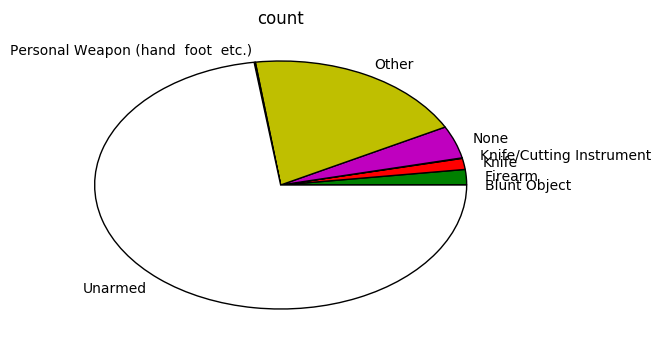

In [50]:
%matplotlib inline
result = _
result.pie()

We also want to see whether the seasonal changes has any effect on the crime rates, so we picked one month from each quarter to see the crime count. And it seems that summer has the highest count of crime, which coincide with some scientific idea that crime rates peak in summer due to the relatively high temperature and some other factors. 

In [51]:
%%sql
SELECT a.Month, COUNT(*) 
FROM time_dim a, fact b
WHERE a.time_dim_id = b.time_dim_id
AND (a.Month =2 OR a.Month = 7  OR a.Month = 10 OR a.Month = 12)
GROUP BY Month
ORDER BY COUNT DESC;

4 rows affected.


month,count
7,58226
10,45672
12,40470
2,36922


Lastly, we wanted to see whether crimes happened more on a specific day of the week or on weekends. Our guess is that the results would not differs too much however on weekends there might be more crimes because of more drinking and more outdoor activities on weekends. 

In [52]:
%%sql
SELECT a.day_week, COUNT(*) as count
FROM time_dim a, fact b
WHERE a.time_dim_id = b.time_dim_id
GROUP BY day_week
ORDER BY CASE WHEN day_week = 'Sunday' THEN '1'
              WHEN day_week = 'Monday' THEN '2'
              WHEN day_week = 'Tuesday' THEN '3'
              WHEN day_week = 'Wednesday' THEN '4'
              WHEN day_week = 'Thursday' THEN '5'
              WHEN day_week = 'Friday' THEN '6'
              WHEN day_week = 'Saturday' THEN '7'
              ELSE day_week END 

DESC;

7 rows affected.


day_week,count
Saturday,76892
Friday,84062
Thursday,77254
Wednesday,76784
Tuesday,75822
Monday,76512
Sunday,68786


([<matplotlib.patches.Wedge at 0x7fee80e52e80>,
  <matplotlib.text.Text at 0x7fee80df6128>])

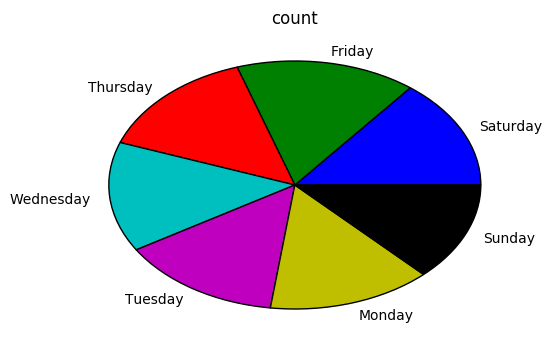

In [53]:
%matplotlib inline
result = _
result.pie()

## Bonus (10 points for one of A or B)


### Option A - Automating ETL

Consider the work you did to load your original raw dataset and then transform it into a dimensional model for analysis.  What would it take to automate this process?  How often would you need to update the data?  Could you easily automate any data cleaning steps?  What checks would you need to put in place to ensure quality?  Would humans need to be involved, or could you automate it all?

Discuss.


### Option B - Augmenting dimensions

Considering your dimensional model, what external data could you find to augment it?  As in the case of bike trips, where weather might provide an interesting added dimension/context not present in the original data, you can probably find another source of data to complement your own model.  Identify one such source and add it to your model, demonstrating its value with a few new queries.

In order to automate the process, we would need to have a time mechanism to accomendate the time change. For example, we can have a primary key for time so that whenever the process is updated the new process will be update according to time changes automatically.

It will be better to update the data every time it is being received, which means, we should update the data in real time. However, it doesnt seem to be practical when it comes to realilty to deal with millions of data. So update twice a day or daily sounds practical.So practically speaking, these data can be updated in real-time or in batch (daily, weekly, monthly) depending on how much data we’re working with.

When a data is collected, we should always deal with the data quality issue before we move to analyze the data. We have to avoid the null variables or keep on improving the missing values. This cleaning process can be done automatically by setting up a stored procedure.So when there is new data entering into the system, the procedure can start to clean the data automatically.

Human is surely needed to be involved in the process in order to maintain the accuracy of the auto procedure's function.But to what extent of the human involvment, it depends on the set up of the auto procedure and data quality.

### The End

Di Niu and Yi Yang shared equal amount of workload for project 2 and we worked on all the problems together. 